# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

In [1]:
#!conda install pandas

In [2]:
#!conda install matplotlib

In [3]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
#Import all the required libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
#import seaborn as sns 
import glob

In [5]:
from collections import Counter
#!pip install imageio
import imageio as io
#conda install -c conda-forge wordcloud
from wordcloud import WordCloud

In [6]:
#!pip install scikit-learn

In [7]:
import tensorflow as tf
from tensorflow import keras
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import Input
from tqdm import tqdm

In [8]:
import os
from keras.preprocessing.text import Tokenizer

In [9]:
print("Tensorflow Version:",tf.__version__)
print("Keras Version     :",keras.__version__)

Tensorflow Version: 2.8.0
Keras Version     : 2.8.0


In [10]:
#conda install -c anaconda tensorflow-estimator

Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create a dataframe which summarizes the image, path & captions as a dataframe

4.Create a list which contains all the captions & path

5.Visualise the top 30 occuring words in the captions



In [11]:
#Import the dataset and read the image into a seperate variable

images='archive/Images/'

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


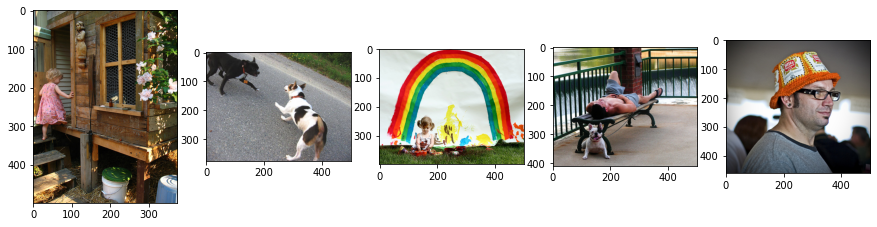

In [12]:
#Visualise both the images & text present in the dataset

Display_images = all_imgs[0:10]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(15)

for axis, image in zip(axes, Display_images):
    axis.imshow(io.imread(image))


In [13]:
#Import the dataset and read the text file into a seperate variable

text_file = 'archive/captions.txt'

def load_doc(filename):
    
    #your code here
    
    open_file = open(filename, 'r', encoding='latin-1') # reads the file
    text = open_file.read()
    open_file.close()
    
    return text

doc = load_doc(text_file)
print(doc[:500])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .
1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .
1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
1001773457_577c3


Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [14]:
img_path='archive/Images/'

all_img_id= [] #store all the image id here
all_img_vector= []  #store all the image path here
annotations= [] #store all the captions here

# We have skip first line is caption as its the heading
with open('archive/captions.txt') as f:
    next(f)
    
    for line in f:
        split_arr = line.split(',')
        all_img_id.append(split_arr[0])
        annotations.append(split_arr[1].rstrip('\n.')) # split when next line
        all_img_vector.append(img_path+split_arr[0])

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df

,ID,Path,Captions
0,1000268201_693b08cb0e.jpg,archive/Images/1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,archive/Images/1000268201_693b08cb0e.jpg,A girl going into a wooden building
2,1000268201_693b08cb0e.jpg,archive/Images/1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse
3,1000268201_693b08cb0e.jpg,archive/Images/1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,archive/Images/1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
...,...,...,...
40450,997722733_0cb5439472.jpg,archive/Images/997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472.jpg,archive/Images/997722733_0cb5439472.jpg,A man is rock climbing high in the air
40452,997722733_0cb5439472.jpg,archive/Images/997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472.jpg,archive/Images/997722733_0cb5439472.jpg,A rock climber in a red shirt


In [15]:
len(annotations)

40455

In [16]:
len(all_img_id)

40455

In [17]:
len(all_img_id)/5

8091.0

In [18]:
#Create a list which contains all the captions
#annotations=#write your code here

#add the <start> & <end> token to all those captions as well

#Create a list which contains all the path to the images
#all_img_path=#write your code here

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_id)))

Total captions present in the dataset: 40455
Total images present in the dataset: 40455


In [19]:
#Create the vocabulary & the counter for the captions

vocabulary= [word.lower() for line in annotations for word in line.split()]#write your code here

val_count=Counter(vocabulary)
val_count

Counter({'a': 60196,
         'child': 1507,
         'in': 18174,
         'pink': 702,
         'dress': 332,
         'is': 9069,
         'climbing': 490,
         'up': 1215,
         'set': 105,
         'of': 6495,
         'stairs': 109,
         'an': 2325,
         'entry': 1,
         'way': 48,
         'girl': 3277,
         'going': 145,
         'into': 1046,
         'wooden': 278,
         'building': 485,
         'little': 1736,
         'playhouse': 6,
         'the': 17507,
         'to': 3005,
         'her': 1102,
         'cabin': 4,
         'black': 3620,
         'dog': 7948,
         'and': 8057,
         'spotted': 36,
         'are': 3365,
         'fighting': 130,
         'tri-colored': 12,
         'playing': 1954,
         'with': 7304,
         'each': 399,
         'other': 667,
         'on': 10357,
         'road': 380,
         'white': 3706,
         'brown': 2457,
         'spots': 28,
         'staring': 57,
         'at': 2810,
         'stree

<AxesSubplot:xlabel='Word'>

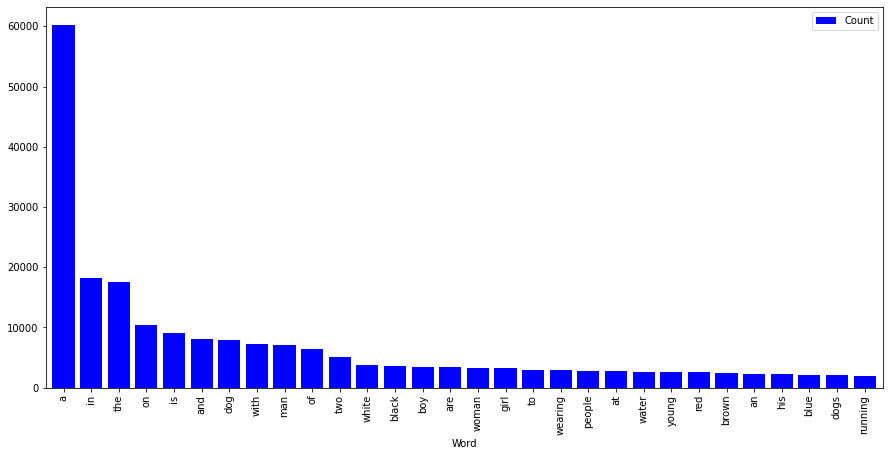

In [20]:
#Visualise the top 30 occuring words in the captions

top_30 = val_count.most_common(30)
top_30_df = pd.DataFrame(top_30, columns=['Word', 'Count'])
top_30_df.plot.bar(x='Word', y='Count', width=0.8, figsize=(15,7), color = 'blue')

#write your code here

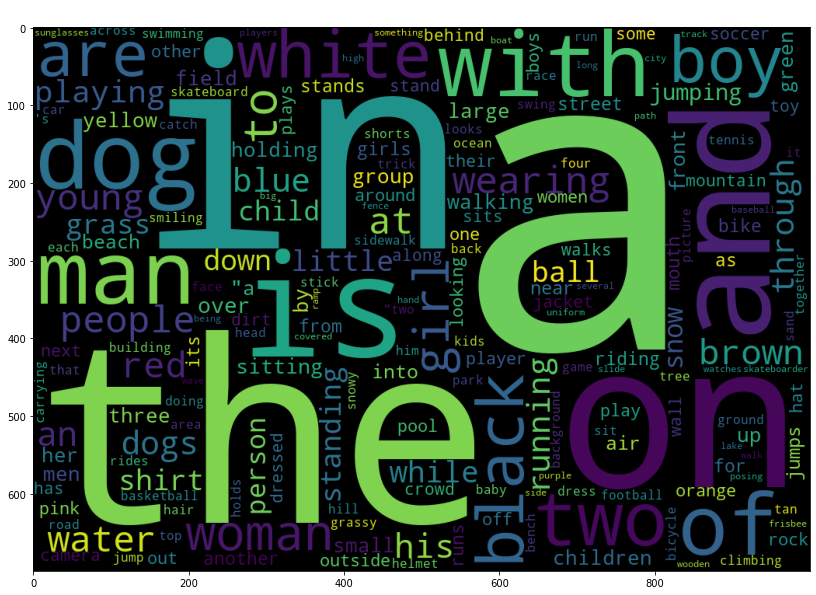

In [21]:
wordcloud = WordCloud(width =1000, height = 700).generate_from_frequencies(val_count)
plt.figure(figsize=(15,10))
plt.title("Most frequent words in the captions", fontsize=20,color='white')
plt.imshow(wordcloud)
plt.show()

### Data cleaning

In [22]:
#!pip install nltk

In [23]:
# importing the string module
import re, nltk, string
# printing the punctuation
puncts = string.punctuation

In [24]:
def Text_Preprocessing(text):
  # make text to lower
  text = text.lower()
  # substitute words inside curly brackets with a single space
  text = re.sub('{^a-zA-Z}',' ',text)
  text = re.sub(r'\s*\bx+\b', '', text)
  # substitute one of more space with a single space
  text = re.sub(' +',' ',text)
  # remove numbers
  text = re.sub(r'\d+','',text)
  # remove punctuation
  text = re.sub(r'[?|$|.|%|&|(|)|@|*|+|-|~|!|{|}|,|(|)|/]',r'',text)
  # remove alphanumeric
  text = re.sub(r'\w*\d\w*', '', text)
  # keep text by removing hashtag
  text = re.sub(r'#','', text)
  text = text.strip()
  return text

In [25]:
annotations_df = pd.DataFrame(annotations, columns=['Annotations'])
annotations_df['Annotations'] = annotations_df['Annotations'].apply(Text_Preprocessing)
annotations_df.head(10)

,Annotations
0,a child in a pink dress is climbing up a set o...
1,a girl going into a wooden building
2,a little girl climbing into a wooden playhouse
3,a little girl climbing the stairs to her playh...
4,a little girl in a pink dress going into a woo...
5,a black dog and a spotted dog are fighting
6,a black dog and a tri-colored dog playing with...
7,a black dog and a white dog with brown spots a...
8,two dogs of different breeds looking at each o...
9,two dogs on pavement moving toward each other


In [26]:
annotations = annotations_df['Annotations'].to_list()
annotations[0:10]

['a child in a pink dress is climbing up a set of stairs in an entry way',
 'a girl going into a wooden building',
 'a little girl climbing into a wooden playhouse',
 'a little girl climbing the stairs to her playhouse',
 'a little girl in a pink dress going into a wooden cabin',
 'a black dog and a spotted dog are fighting',
 'a black dog and a tri-colored dog playing with each other on the road',
 'a black dog and a white dog with brown spots are staring at each other in the street',
 'two dogs of different breeds looking at each other on the road',
 'two dogs on pavement moving toward each other']

In [27]:
#add <start> & <end> token to all sessions.

annotations = ['<start>' + ' ' + eachline + ' ' + '<stop>' for eachline in annotations]
annotations[0:10]

['<start> a child in a pink dress is climbing up a set of stairs in an entry way <stop>',
 '<start> a girl going into a wooden building <stop>',
 '<start> a little girl climbing into a wooden playhouse <stop>',
 '<start> a little girl climbing the stairs to her playhouse <stop>',
 '<start> a little girl in a pink dress going into a wooden cabin <stop>',
 '<start> a black dog and a spotted dog are fighting <stop>',
 '<start> a black dog and a tri-colored dog playing with each other on the road <stop>',
 '<start> a black dog and a white dog with brown spots are staring at each other in the street <stop>',
 '<start> two dogs of different breeds looking at each other on the road <stop>',
 '<start> two dogs on pavement moving toward each other <stop>']

In [28]:
print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_id)))

Total captions present in the dataset: 40455
Total images present in the dataset: 40455


## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [29]:
df_tokenizer = pd.DataFrame({'Annotations':annotations})
df_tokenizer.head(10)

,Annotations
0,<start> a child in a pink dress is climbing up...
1,<start> a girl going into a wooden building <s...
2,<start> a little girl climbing into a wooden p...
3,<start> a little girl climbing the stairs to h...
4,<start> a little girl in a pink dress going in...
5,<start> a black dog and a spotted dog are figh...
6,<start> a black dog and a tri-colored dog play...
7,<start> a black dog and a white dog with brown...
8,<start> two dogs of different breeds looking a...
9,<start> two dogs on pavement moving toward eac...


In [30]:
# create the tokenizer
# Create word-to-index and index-to-word mappings.

### Custom tokenizer

In [31]:
PAD = 0   # Used for padding short sentences
SOS_token = 1   # Start-of-sentence token
EOS_token = 2   # End-of-sentence token

In [32]:
class Vocabulary:

    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {PAD: "PAD", SOS_token: "<start>", EOS_token: "<stop>"}
        self.num_words = 0
        self.num_sentences = 0
        self.longest_sentence = 0

    def add_word(self, word):
        if word not in self.word2index:
            # First entry of word into vocabulary
            self.word2index[word] = self.num_words
            self.word2count[word] = 1
            self.index2word[self.num_words] = word
            self.num_words += 1
        else:
            # Word exists; increase word count
            self.word2count[word] += 1
            
    def add_sentence(self, sentence):
        sentence_len = 0
        for word in sentence.split(' '):
            sentence_len += 1
            self.add_word(word)
        if sentence_len > self.longest_sentence:
            # This is the longest sentence
            self.longest_sentence = sentence_len
        # Count the number of sentences
        self.num_sentences += 1

    def to_word(self, index):
        return self.index2word[index]

    def to_index(self, word):
        return self.word2index[word]

In [33]:
voc = Vocabulary('test')
voc

In [34]:
for annotation in annotations:
    voc.add_sentence(annotation)

In [35]:
for word in range(voc.num_words):
    print(voc.to_word(word))

<start>
a
child
in
pink
dress
is
climbing
up
set
of
stairs
an
entry
way
<stop>
girl
going
into
wooden
building
little
playhouse
the
to
her
cabin
black
dog
and
spotted
are
fighting
tri-colored
playing
with
each
other
on
road
white
brown
spots
staring
at
street
two
dogs
different
breeds
looking
pavement
moving
toward
covered
paint
sits
front
painted
rainbow
hands
bowl
sitting
large
small
grass
plays
fingerpaints
canvas
it
there
pigtails
painting
young
outside
man
lays
bench
while
his
by
him
which
also
tied
sleeping
next
shirtless
lies
park
laying
holding
leash
ground
orange
hat
starring
something
wears
glasses
gauges
wearing
blitz
beer
can
crocheted
pierced
ears
rope
net
red
roping
climbs
bridge
grips
onto
ropes
playground
running
grassy
garden
surrounded
fence
through
boston
terrier
lush
green
runs
near
"a
shakes
its
head
shore
edge
beach
ball
"dog
feet
water
standing
turned
one
side
boy
smiles
stony
wall
city
overalls
working
stone
aross
walking
paved
metal
pole
behind
smiling
shirt
bl

posts
mirror
burgundy
hoodie
own
softball
winding
throw
tosses
overcast
tossing
throws
"at
fluffy
shute
emerging
poodle
leaving
blue-striped
old-fashioned
marked
circle
camping
equipment
"little
flowered
peaking
leaves
peeks
foliage
rock-climb
prefabricated
frightened
half-dressed
bottom
surfing
made
dune
snowboarding
leaf
saddle
tub
squeeze
bath
bin
cloth
streambed
drags
rag
almost-dried
towel
bmxer
overhang
formation
tire-swing
horizontal
crosses
hung
sniff
somthing
walkway
corridor
windowed
industrial
enjoying
terrace
either
narrow
paddlers
propel
tree-lined
wine
twenty
fourth
restaurant
tak
held
aiming
rifle
shoots
shoot
screen
laptop
earphones
macintosh
cover
sheet
mannequins
case
outfits
sunflowers
fishes
parked
askance
stonesign
"these
penzance
welcomes
you
hi-viz
welcome
carved
pushes
doll
mustache
plaid
elder
overlooks
florescent
speaks
overgrown
streaked
fur
uggs
goth
trendy
usual
pot
had
kart
grinning
go-karts
excited
will
be
go-cart
only
branch
owner
rummages
collection
stu

fancy
tilts
upward
glove
earring
groucho
marx
novelty
assisting
act
ice-skating
operate
boredom
jewish
violin
listens
cramped
lunch
mall
middleaged
rungs
stunt
half-completed
childing
fort
stripy
built
doorway
filming
"mother
labrador
pouting
long-handled
well
apportioned
cardigan
eastern
campflauge
fours
cami
hawaiin
runway
placing
playgym
tiger
colorings
grayhound
derby
tattoo
indian
native
driftwood
pumps
tabs
ceiling
taps
pinscher
coverings
hairnet
wrestles
nuzzling
shirted
fitls
tourist
location
wade
mushrooms
clown
whistle
blows
establishment
dimly-lit
crime
seawall
churns
enviorment
repel
reclines
"tw
rubs
taught
stoops
watermelon
watermelons
airplane
"toddler
cones
dads
cone
flames
flaming
hulahoop
trainer
pink-coated
fingers
smeared
sunsets
reflecting
"someone
diferent
sledding
oar
corgis
palace
looling
military
british
guardsman
winters
panda
shoveling
snowshovel
mini
shovel
shovels
apex
sheppard
bting
retrieved
flooded
japanese
schoolgirls
lining
purchase
tickets
theater
tic

patroling
flinging
dripping
whips
ejected
chopsticks
sushi
budweiser-sponsored
accelerates
dragster
budweiser
sprint
speedway
spewing
sundown
ramps
badly
bull-branded
jesus
hell
prizes
blown-up
demonstrating
avoids
beijing
olympics
roller-coaster
shored
lack
regains
composure
trailing
becomes
completes
hula-hoop
alotment
"bike
clibing
festive
piling
equipments
seaguls
gren
pails
telescope
rover
woodlands
roll
spool
cable
pice
machinery
strawberry
turtle
tortoise
berry
fed
astride
clips
carabiner
hooking
attaching
attaches
automobile
beyond
gates
peer
numeral
slices
card
sales
merchant
mullet
unique
moss
standind
fig
fit
tournament
lifeboat
released
rushed
alcohol
churning
coarse
ratty
elbow
unfinished
trucks
any
huddled
gators
closer
stockcar
guardrail
retrive
burrowing
shark
halfway
swam
videotaping
record
styrofoam
banjo
agency
pursuing
swing-type
sleek
passenager
sidecar
scuffle
"nine
powerful
awkwardly
blocked
pensively
thinks
jetskiing
bow-tie
shews
russel
midstride
cartoon
dreeds

noisemaker
popper
ballerinas
learn
deserted
aig
grazes
magnificant
labradoodle
obscene
guitarists
reveals
upturned
custom
thread
spindle
thirds
primping
camels
legos
born
hsirt
plling
shawls
barber
sled-like
rif=ding
long-beaked
agains
amnesty
international
interacts
exchanges
offstage
vision
roiling
dumpster
ally
rehearsing
ninja-like
rangers
ranger
weird
wet-suit
para-surfing
horned
strains
yougn
tucking
brush-land
green-glow
mallard
three-way
dressed-up
dimlight
total
district
ages
backgrounds
peanut
butter
admire
flirts
"pleople
kilts
taped
stoplight
gleaming
trio
waded
ballplayers
personal
womand
precariously
coutryside
tye-dyed
lowering
teases
slinging
mardis
gras
suggestively
breasts
bare-chested
k
crafted
snow-boarder
easel
coverall
paintbrush
rim
scoring
jumpsuites
preparation
sweatband
burned
sucker
in-line
motorbiker
bangs
browm
breakdances
rainling
twho
gettin
sloped
swishing
seperate
overlooked
stickball
dew
mountain-dew
ant
's-eye-view
types
sub
saharan
bandmates
associat

In [36]:
voc.to_index('<start>')

0

In [37]:
anno_tkns = []
anno_idxs = []

for sent in annotations:
    sent_tkns = []
    sent_idxs = []
    for word in sent.split(' '):
        sent_tkns.append(word)
        sent_idxs.append(voc.to_index(word))
    anno_tkns.append(sent_tkns)
    anno_idxs.append(sent_idxs)

In [38]:
annotations[0:5]

['<start> a child in a pink dress is climbing up a set of stairs in an entry way <stop>',
 '<start> a girl going into a wooden building <stop>',
 '<start> a little girl climbing into a wooden playhouse <stop>',
 '<start> a little girl climbing the stairs to her playhouse <stop>',
 '<start> a little girl in a pink dress going into a wooden cabin <stop>']

In [39]:
anno_idxs[0:5]

[[0, 1, 2, 3, 1, 4, 5, 6, 7, 8, 1, 9, 10, 11, 3, 12, 13, 14, 15],
 [0, 1, 16, 17, 18, 1, 19, 20, 15],
 [0, 1, 21, 16, 7, 18, 1, 19, 22, 15],
 [0, 1, 21, 16, 7, 23, 11, 24, 25, 22, 15],
 [0, 1, 21, 16, 3, 1, 4, 5, 17, 18, 1, 19, 26, 15]]

In [40]:
coded_captions = anno_idxs
print(len(coded_captions))

40455


In [41]:
token_wordcount = voc.word2count
token_wordcount = list(token_wordcount.items())

In [42]:
token_wordcount[0:10]

[('<start>', 40455),
 ('a', 60196),
 ('child', 1507),
 ('in', 18174),
 ('pink', 702),
 ('dress', 332),
 ('is', 9069),
 ('climbing', 490),
 ('up', 1215),
 ('set', 105)]

In [43]:
tokenised_token = [list_item[:][0] for list_item in token_wordcount]
tokenised_token_count = [list_item[:][1] for list_item in token_wordcount]

tokenized_df = pd.DataFrame({'Tokens':tokenised_token, 'Count':tokenised_token_count})
tokenized_df.head(10)

,Tokens,Count
0,<start>,40455
1,a,60196
2,child,1507
3,in,18174
4,pink,702
5,dress,332
6,is,9069
7,climbing,490
8,up,1215
9,set,105


In [44]:
GroupByTokens = tokenized_df.sort_values(by='Count', ascending=False)
GroupByTokens = GroupByTokens.reset_index()
GroupByTokens = GroupByTokens.drop(['index'], axis=1)
GroupByTokens = GroupByTokens.head(30)
GroupByTokens

,Tokens,Count
0,a,60196
1,<start>,40455
2,<stop>,40455
3,in,18174
4,the,17507
5,on,10357
6,is,9069
7,and,8057
8,dog,7948
9,with,7304


<AxesSubplot:xlabel='Tokens'>

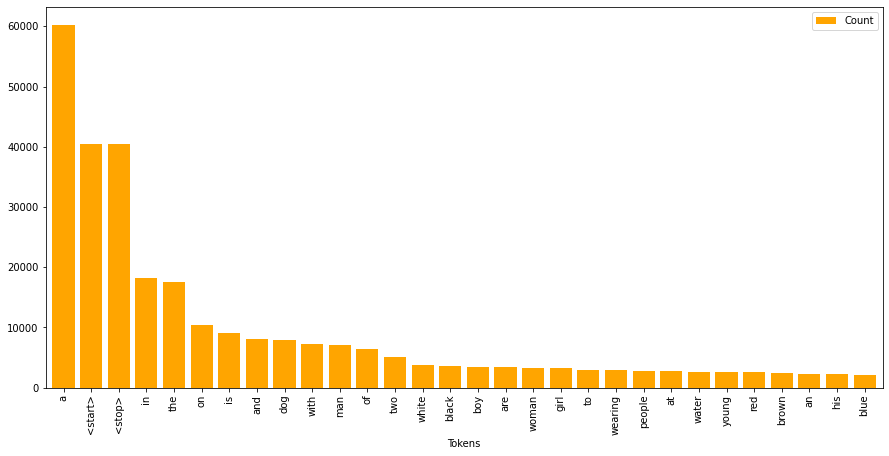

In [45]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing

GroupByTokens.plot.bar(x='Tokens', y='Count', width=0.8, figsize=(15,7), color = 'orange')

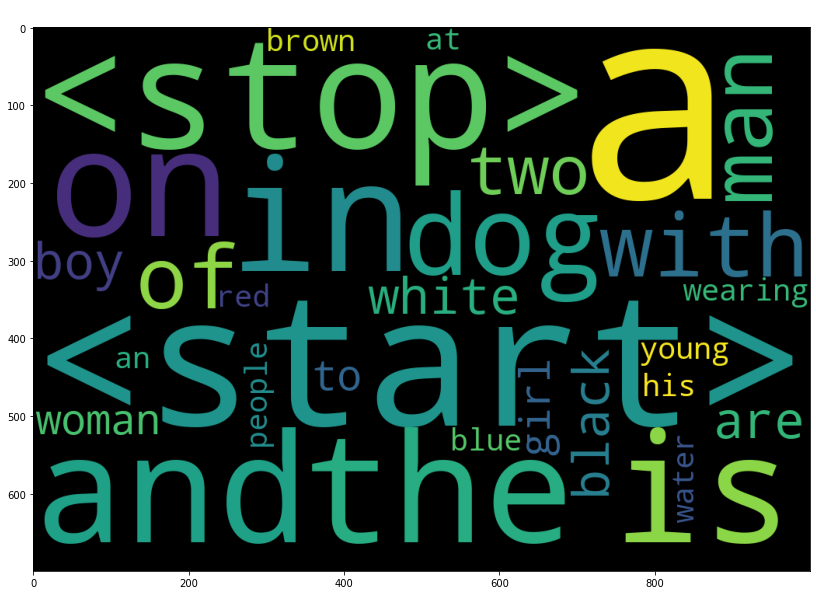

In [46]:
token_valcount=Counter(GroupByTokens['Tokens'])

wordcloud = WordCloud(width =1000, height = 700).generate_from_frequencies(token_valcount)
plt.figure(figsize=(15,10))
plt.title("Most frequent words after tokenization", fontsize=20,color='white')
plt.imshow(wordcloud)
plt.show()

In [47]:
# Pad each vector to the max_length of the captions ^ store it to a vairable
voc.longest_sentence

35

In [48]:
cap_vector= tf.keras.preprocessing.sequence.pad_sequences(coded_captions, maxlen=voc.longest_sentence, dtype='int32', padding='post', value=0)

print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 35)


In [49]:
cap_vector[0:5]

array([[ 0,  1,  2,  3,  1,  4,  5,  6,  7,  8,  1,  9, 10, 11,  3, 12,
        13, 14, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  1, 16, 17, 18,  1, 19, 20, 15,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  1, 21, 16,  7, 18,  1, 19, 22, 15,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  1, 21, 16,  7, 23, 11, 24, 25, 22, 15,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  1, 21, 16,  3,  1,  4,  5, 17, 18,  1, 19, 26, 15,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0]])

In [50]:
annotations[0:5]

['<start> a child in a pink dress is climbing up a set of stairs in an entry way <stop>',
 '<start> a girl going into a wooden building <stop>',
 '<start> a little girl climbing into a wooden playhouse <stop>',
 '<start> a little girl climbing the stairs to her playhouse <stop>',
 '<start> a little girl in a pink dress going into a wooden cabin <stop>']

### Keras Tokenizer

In [51]:
top_vocabulary = 5001

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_vocabulary,
                                                  filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n',  # < and > are removed from filter
                                                  lower=True, 
                                                  split=' ', 
                                                  char_level=False, 
                                                  oov_token='UNK',
                                                  document_count=0)

tokenizer.fit_on_texts(annotations) #Updates internal vocabulary based on a list of texts.

coded_seq_captions = tokenizer.texts_to_sequences(annotations) #Transforms each text in texts to a sequence of integers.

# 0 is a reserved index that won't be assigned to any word.Let's add PAD token for zero
tokenizer.word_index['PAD'] = 0
tokenizer.index_word[0] = 'PAD'

In [52]:
print(tokenizer.oov_token)
tokenizer.index_word

UNK


{1: 'UNK',
 2: 'a',
 3: '<start>',
 4: '<stop>',
 5: 'in',
 6: 'the',
 7: 'on',
 8: 'is',
 9: 'and',
 10: 'dog',
 11: 'with',
 12: 'man',
 13: 'of',
 14: 'two',
 15: 'white',
 16: 'black',
 17: 'boy',
 18: 'are',
 19: 'woman',
 20: 'girl',
 21: 'to',
 22: 'wearing',
 23: 'people',
 24: 'at',
 25: 'water',
 26: 'young',
 27: 'red',
 28: 'brown',
 29: 'an',
 30: 'his',
 31: 'blue',
 32: 'dogs',
 33: 'running',
 34: 'through',
 35: 'playing',
 36: 'shirt',
 37: 'while',
 38: 'down',
 39: 'little',
 40: 'standing',
 41: 'ball',
 42: 'grass',
 43: 'person',
 44: 'child',
 45: 'snow',
 46: 'jumping',
 47: 'over',
 48: 'three',
 49: 'front',
 50: 'sitting',
 51: 'small',
 52: 'up',
 53: 'field',
 54: 'holding',
 55: 'large',
 56: 'group',
 57: 'by',
 58: 'green',
 59: 'yellow',
 60: 'children',
 61: 'walking',
 62: 'men',
 63: 'her',
 64: 'into',
 65: 'beach',
 66: 'air',
 67: 'near',
 68: 'jumps',
 69: 'mouth',
 70: 'street',
 71: 'runs',
 72: 'for',
 73: 'another',
 74: 'riding',
 75: 'from

In [53]:
token_wordcount = tokenizer.word_counts
token_wordcount

OrderedDict([('<start>', 40455),
             ('a', 61435),
             ('child', 1517),
             ('in', 18193),
             ('pink', 706),
             ('dress', 332),
             ('is', 9069),
             ('climbing', 495),
             ('up', 1251),
             ('set', 106),
             ('of', 6504),
             ('stairs', 109),
             ('an', 2358),
             ('entry', 1),
             ('way', 51),
             ('<stop>', 40455),
             ('girl', 3284),
             ('going', 145),
             ('into', 1046),
             ('wooden', 278),
             ('building', 485),
             ('little', 1750),
             ('playhouse', 6),
             ('the', 17677),
             ('to', 3008),
             ('her', 1102),
             ('cabin', 4),
             ('black', 3641),
             ('dog', 7958),
             ('and', 8066),
             ('spotted', 37),
             ('are', 3365),
             ('fighting', 131),
             ('tri', 12),
             ('colo

In [54]:
max_seq_length = max([len(seq) for seq in cap_vector])

cap_vector= tf.keras.preprocessing.sequence.pad_sequences(coded_seq_captions, 
                                                          maxlen=max_seq_length, 
                                                          dtype='int32', 
                                                          padding='post', 
                                                          value=0)

print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 35)


In [55]:
cap_vector[0:10]

array([[   3,    2,   44,    5,    2,   89,  173,    8,  116,   52,    2,
         389,   13,  385,    5,   29,    1,  670,    4,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   3,    2,   20,  313,   64,    2,  197,  120,    4,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   3,    2,   39,   20,  116,   64,    2,  197, 2362,    4,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   3,    2,   39,   20,  116,    6,  385,   21,   63, 2362,    4,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   3,    2,   39,   

In [56]:
annotations[0:10]

['<start> a child in a pink dress is climbing up a set of stairs in an entry way <stop>',
 '<start> a girl going into a wooden building <stop>',
 '<start> a little girl climbing into a wooden playhouse <stop>',
 '<start> a little girl climbing the stairs to her playhouse <stop>',
 '<start> a little girl in a pink dress going into a wooden cabin <stop>',
 '<start> a black dog and a spotted dog are fighting <stop>',
 '<start> a black dog and a tri-colored dog playing with each other on the road <stop>',
 '<start> a black dog and a white dog with brown spots are staring at each other in the street <stop>',
 '<start> two dogs of different breeds looking at each other on the road <stop>',
 '<start> two dogs on pavement moving toward each other <stop>']

## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

### FAQs on how to resize the images::
* Since you have a list which contains all the image path, you need to first convert them to a dataset using <i>tf.data.Dataset.from_tensor_slices</i>. Once you have created a dataset consisting of image paths, you need to apply a function to the dataset which will apply the necessary preprocessing to each image. 
* This function should resize them and also should do the necessary preprocessing that it is in correct format for InceptionV3.


In [57]:
# write your code here for creating the function. This function should return images & their path
def get_processed_image(img_path):
    im = tf.io.read_file(img_path)
    im = tf.image.decode_jpeg(im,channels=3)
    im = tf.image.central_crop(im, 0.95)
    im = tf.image.resize(im, (299, 299))
    im = tf.keras.applications.inception_v3.preprocess_input(im)
    return im, img_path

Image before processed


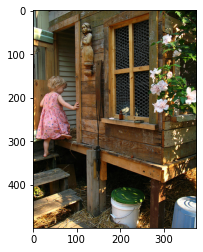

In [58]:
print("Image before processed")
plt.imshow(tf.image.decode_jpeg(tf.io.read_file(all_img_vector[0]),channels=3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image shape after preprocessing : (299, 299, 3)


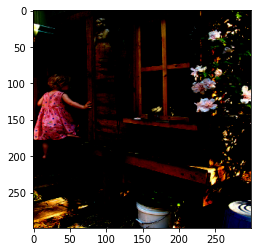

In [59]:
print("Image shape after preprocessing :", get_processed_image(all_img_vector[0])[0].shape)
plt.imshow(get_processed_image(all_img_vector[0])[0])

In [60]:
#write your code here to create the dataset consisting of image paths
sorted_img_vector = sorted(set(all_img_vector))

In [61]:
#write your code here for applying the function to the image path dataset, such that the transformed dataset should contain images & their path
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_imageDataset = tf.data.Dataset.from_tensor_slices(sorted_img_vector)
train_imageDataset = train_imageDataset.map(get_processed_image, num_parallel_calls=AUTOTUNE)
train_imageDataset = train_imageDataset.batch(32,drop_remainder=False)
train_imageDataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [62]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input #write code here to get the input of the image_model
hidden_layer = image_model.layers[-1].output #write code here to get the output of the image_model

image_features_extract_model = keras.Model(inputs = new_input, outputs = hidden_layer) #build the final model using both input & output layer

In [63]:
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                           

                                                                                                  
 average_pooling2d (AveragePool  (None, None, None,   0          ['max_pooling2d_1[0][0]']        
 ing2D)                         192)                                                              
                                                                                                  
 conv2d_5 (Conv2D)              (None, None, None,   12288       ['max_pooling2d_1[0][0]']        
                                64)                                                               
                                                                                                  
 conv2d_7 (Conv2D)              (None, None, None,   76800       ['activation_6[0][0]']           
                                64)                                                               
                                                                                                  
 conv2d_10

                                                                                                  
 conv2d_18 (Conv2D)             (None, None, None,   16384       ['average_pooling2d_1[0][0]']    
                                64)                                                               
                                                                                                  
 batch_normalization_12 (BatchN  (None, None, None,   192        ['conv2d_12[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 batch_normalization_14 (BatchN  (None, None, None,   192        ['conv2d_14[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 batch_nor

                                                                                                  
 batch_normalization_25 (BatchN  (None, None, None,   192        ['conv2d_25[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 activation_19 (Activation)     (None, None, None,   0           ['batch_normalization_19[0][0]'] 
                                64)                                                               
                                                                                                  
 activation_21 (Activation)     (None, None, None,   0           ['batch_normalization_21[0][0]'] 
                                64)                                                               
                                                                                                  
 activatio

                                128)                                                              
                                                                                                  
 conv2d_36 (Conv2D)             (None, None, None,   114688      ['activation_35[0][0]']          
                                128)                                                              
                                                                                                  
 batch_normalization_31 (BatchN  (None, None, None,   384        ['conv2d_31[0][0]']              
 ormalization)                  128)                                                              
                                                                                                  
 batch_normalization_36 (BatchN  (None, None, None,   384        ['conv2d_36[0][0]']              
 ormalization)                  128)                                                              
          

 ormalization)                  160)                                                              
                                                                                                  
 activation_44 (Activation)     (None, None, None,   0           ['batch_normalization_44[0][0]'] 
                                160)                                                              
                                                                                                  
 conv2d_45 (Conv2D)             (None, None, None,   179200      ['activation_44[0][0]']          
                                160)                                                              
                                                                                                  
 batch_normalization_45 (BatchN  (None, None, None,   480        ['conv2d_45[0][0]']              
 ormalization)                  160)                                                              
          

 activation_48 (Activation)     (None, None, None,   0           ['batch_normalization_48[0][0]'] 
                                192)                                                              
                                                                                                  
 activation_49 (Activation)     (None, None, None,   0           ['batch_normalization_49[0][0]'] 
                                192)                                                              
                                                                                                  
 mixed5 (Concatenate)           (None, None, None,   0           ['activation_40[0][0]',          
                                768)                              'activation_43[0][0]',          
                                                                  'activation_48[0][0]',          
                                                                  'activation_49[0][0]']          
          

 batch_normalization_53 (BatchN  (None, None, None,   576        ['conv2d_53[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 batch_normalization_58 (BatchN  (None, None, None,   576        ['conv2d_58[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 batch_normalization_59 (BatchN  (None, None, None,   576        ['conv2d_59[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 activation_50 (Activation)     (None, None, None,   0           ['batch_normalization_50[0][0]'] 
          

 conv2d_60 (Conv2D)             (None, None, None,   147456      ['mixed6[0][0]']                 
                                192)                                                              
                                                                                                  
 conv2d_63 (Conv2D)             (None, None, None,   258048      ['activation_62[0][0]']          
                                192)                                                              
                                                                                                  
 conv2d_68 (Conv2D)             (None, None, None,   258048      ['activation_67[0][0]']          
                                192)                                                              
                                                                                                  
 conv2d_69 (Conv2D)             (None, None, None,   147456      ['average_pooling2d_6[0][0]']    
          

 batch_normalization_71 (BatchN  (None, None, None,   960        ['conv2d_71[0][0]']              
 ormalization)                  320)                                                              
                                                                                                  
 batch_normalization_75 (BatchN  (None, None, None,   576        ['conv2d_75[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 activation_71 (Activation)     (None, None, None,   0           ['batch_normalization_71[0][0]'] 
                                320)                                                              
                                                                                                  
 activation_75 (Activation)     (None, None, None,   0           ['batch_normalization_75[0][0]'] 
          

                                384)                                                              
                                                                                                  
 activation_79 (Activation)     (None, None, None,   0           ['batch_normalization_79[0][0]'] 
                                384)                                                              
                                                                                                  
 activation_82 (Activation)     (None, None, None,   0           ['batch_normalization_82[0][0]'] 
                                384)                                                              
                                                                                                  
 activation_83 (Activation)     (None, None, None,   0           ['batch_normalization_83[0][0]'] 
                                384)                                                              
          

 ormalization)                  384)                                                              
                                                                                                  
 batch_normalization_92 (BatchN  (None, None, None,   1152       ['conv2d_92[0][0]']              
 ormalization)                  384)                                                              
                                                                                                  
 conv2d_93 (Conv2D)             (None, None, None,   393216      ['average_pooling2d_8[0][0]']    
                                192)                                                              
                                                                                                  
 batch_normalization_85 (BatchN  (None, None, None,   960        ['conv2d_85[0][0]']              
 ormalization)                  320)                                                              
          

In [64]:
# write the code to apply the feature_extraction model to your earlier created dataset which contained images & their respective paths
# Once the features are created, you need to reshape them such that feature shape is in order of (batch_size, 8*8, 2048)

image_features_dict={}
for image, image_path in tqdm(train_imageDataset): #using tqdm as progress bar
    features_for_batch = image_features_extract_model(image) #feeding images from above created dataset to Inception v3 which we build above
    #fb_shape = features_for_batch.get_shape().as_list()
    #features_for_batch_flattened = tf.contrib.layers.flatten(fb_shape) 
    features_for_batch_flattened = tf.reshape(features_for_batch,
                             (features_for_batch.shape[0], -1, features_for_batch.shape[3])) ##We are sqeezing/squashing 
                                   
    for batch_feat, path in zip(features_for_batch_flattened, image_path):
        feature_path = path.numpy().decode("utf-8")
        image_features_dict[feature_path] =  batch_feat.numpy()
print(features_for_batch.shape)

100%|████████████████████████████████████████████████████████████████████████████████| 253/253 [17:11<00:00,  4.08s/it]


(27, 8, 8, 2048)


In [65]:
features_for_batch

<tf.Tensor: shape=(27, 8, 8, 2048), dtype=float32, numpy=
array([[[[0.00000000e+00, 4.36432689e-01, 3.92007798e-01, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 2.19494626e-01],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 1.13634288e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 3.23693097e-01, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         

In [66]:
features_for_batch_flattened

<tf.Tensor: shape=(27, 64, 2048), dtype=float32, numpy=
array([[[0.        , 0.4364327 , 0.3920078 , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.21949463],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         1.5246427 , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.5130862 , 0.        ],
        [0.6948726 , 1.7728504 , 0.        , ..., 0.        ,
         0.01977263, 0.        ]],

       [[0.        , 0.        , 0.        , ..., 1.0564207 ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.66781145,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.32886586,
         0.        , 0.        ],
        ...,
        [0.        , 0.04987403, 0.43165353, ..., 0.

In [67]:
print(len(image_features_dict))
print(batch_feat.shape)

8091
(64, 2048)


### FAQs on how to store the features:
* You can store the features using a dictionary with the path as the key and values as the feature extracted by the inception net v3 model OR
* You can store using numpy(np.save) to store the resulting vector.

## Dataset creation
1.Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42

2.Create a function which maps the image path to their feature. 

3.Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [68]:
#write your code here

imageSet_train, imageSet_test, caption_train, caption_test = train_test_split(all_img_vector,cap_vector,test_size=0.2,random_state=30)

In [69]:
print("Training data for images: " + str(len(imageSet_train)))
print("Testing data for images: " + str(len(imageSet_test)))
print("Training data for Captions: " + str(len(caption_train)))
print("Testing data for Captions: " + str(len(caption_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [70]:
# Create a function which maps the image path to their feature. 
# This function will take the image_path & caption and return it's feature & respective caption.

def map_func(image,captions):
    img_tensor = image_features_dict[image.decode('utf-8')] # write your code here to extract the features from the dictionary stored earlier
    return img_tensor,captions

### FAQs on how to load the features:
* You can load the features using the dictionary created earlier OR
* You can store using numpy(np.load) to load the feature vector.

In [71]:
# create a builder function to create dataset which takes in the image path & captions as input
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier

from tensorflow.python.ops.gen_dataset_ops import prefetch_dataset
# create a builder function to create dataset which takes in the image path & captions as input
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier

BUFFER_SIZE = 1000

# Batch size
BATCH_SIZE = 32 ##tried with different batch sizes.kernal is dieing for 32 .So finally fixed 64.

def gen_dataset(images_data, captions_data):
    
    # Creating a Dataset using tf.data.Dataset.from_tensor_slice 
    dataset = tf.data.Dataset.from_tensor_slices((images_data, captions_data))

    # num_parallel_calls= tf.data.AUTOTUNE is used, then the number of parallel calls is set dynamically based on available CPU.
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(map_func, [item1, item2], [tf.float32, tf.int32]),
                          num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    # reshuffle_each_iteration=True indicate Shuffle order should be different for each epoch.
    # Keeping batch_size=64 (64 consecutive elements of this dataset is combined in a single batch).
    # We don't want to drop the last batch if it contains element less than 64.So let's set drop_remainder=False 
    # Prefetch function is used to prepare later elements while the current element is being processed.
    
    dataset = dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=True)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

In [72]:
train_dataset=gen_dataset(imageSet_train,caption_train)
test_dataset=gen_dataset(imageSet_test,caption_test)

In [73]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(32, 64, 2048)
(32, 35)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [74]:
embedding_dim = 256 
units = 512
vocab_size = 5001 #top 5,000 words +1

train_num_steps = len(imageSet_train) // BATCH_SIZE #len(total train images) // BATCH_SIZE
test_num_steps = len(imageSet_test) // BATCH_SIZE #len(total test images) // BATCH_SIZE

### Encoder

In [75]:
class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim) #build your Dense layer with relu activation
        self.dropout = tf.keras.layers.Dropout(0.25)
        
    def call(self, features): 
        features = self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features = tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0.0) 
        return features

In [76]:
# Initialize the encoder
encoder=Encoder(embedding_dim)

### Attention model

In [77]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units) # build your Dense layer for encoder
        self.W2 = tf.keras.layers.Dense(units) # build your Dense layer for decoder 
        self.V = tf.keras.layers.Dense(1) #build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        
        # Returns a tensor with a length 1 axis inserted at index axis
        hidden_with_time_axis = tf.expand_dims(hidden, 1) # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        
        # Calculate scores
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))# build your score funciton to shape: (batch_size, 8*8, units)
        
        # Apply softmax on score to get softmax score
        attention_weights =  tf.keras.activations.softmax(self.V(score)) # extract your attention weights with shape: (batch_size, 8*8, 1)
        
        # multiply softmax score with features to get context vector
        context_vector =  attention_weights * features #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        
        # Computes the sum of elements across dimensions of a tensor
        context_vector = tf.math.reduce_sum(context_vector, axis=1, keepdims=False, name=None)# reduce the shape to (batch_size, embedding_dim)
        
        return context_vector, attention_weights

### Decoder

In [78]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        #initialize attention model
        self.attention = Attention_model(self.units) #iniitalise your Attention model with units
        
        # Initialize the embedding layer
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim, 
                                               embeddings_initializer='uniform',
                                               embeddings_regularizer=None, 
                                               activity_regularizer=None,
                                               embeddings_constraint=None, 
                                               mask_zero=False)  #build your Embedding layer
        
        self.gru = tf.keras.layers.GRU(self.units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer
        
        self.dropout = tf.keras.layers.Dropout(0.25)
        

    def call(self, emb_sequence, features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        
        embed =  self.embed(emb_sequence) # embed your input to shape: (batch_size, 1, embedding_dim)
        
        mask = self.embed.compute_mask(emb_sequence)
        
        #reshape context vector to length 1 and concat it with embedding layer
        embed =  tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1, name='concat_contectVector_Embed')# Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        
        output,state = self.gru(embed, mask = mask) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        
        output = self.d1(output)
        
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [79]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [80]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
decoder_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(decoder_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)
print('hidden layer shape from Decoder: {}'.format(hidden_out.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (32, 64, 256)
Predcitions shape from Decoder: (32, 5001)
Attention weights shape from Decoder: (32, 64, 1)
hidden layer shape from Decoder: (32, 512)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [81]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) #define the optimizer

# class SparseCategoricalCrossentropy will be used as
#  1. targets are integers
#  2.  saves time in memory as well as computation time
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, 
                                                            reduction=tf.keras.losses.Reduction.NONE,
                                                            name='sparse_categorical_crossentropy')  #define your loss object

In [82]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [83]:
checkpoint_path = "./archives/Chekpoints"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [84]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

* While creating the training step for your model, you will apply Teacher forcing.
* Teacher forcing is a technique where the target/real word is passed as the next input to the decoder instead of previous prediciton.

In [85]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    
    hidden = decoder.init_state(batch_size=target.shape[0])
    
    decoder_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        
        enc_features = encoder(img_tensor)
        
        for i in range(1, target.shape[1]):
            
            predictions, hidden, attn_w = decoder(decoder_input, enc_features, hidden)
            
            loss += loss_function(target[:, i], predictions)
            
            #decoder_input = tf.expand_dims(target[:, i], 1)
            
        average_loss = (loss/int(target.shape[1]))
        
        total_trainables_vars = encoder.trainable_variables + decoder.trainable_variables
        
        gradients = tape.gradient(loss, total_trainables_vars)  # calculate gradients with respect to every trainable variables
        
        #compute gradients and apply it to the optimizer and backpropagate.
        optimizer.apply_gradients(zip(gradients, total_trainables_vars))
        
    return loss, average_loss

* While creating the test step for your model, you will pass your previous prediciton as the next input to the decoder.

In [86]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    
    #write your code here to do the testing steps
    hidden = decoder.init_state(batch_size=target.shape[0])

    decoder_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape: #Record operations for automatic differentiation.
        #write your code here to do the training steps
        enc_features = encoder(img_tensor)

        # Using the teacher forcing technique where the target word is passed as the next input to the decoder.
        for t in range(1, target.shape[1]):
            # passing encoder_output to the decoder
            predictions, hidden, attn_w = decoder(decoder_input, enc_features, hidden)

            loss += loss_function(target[:, t], predictions) 

            # using teacher forcing
            #decoder_input = tf.expand_dims(target[:, t], 1)
    
        average_loss = (loss / int(target.shape[1]))

        total_trainables_vars = encoder.trainable_variables + decoder.trainable_variables

        gradients = tape.gradient(loss, tot_trainables_vars) # calculate gradients with respect to every trainable variables

        #compute gradients and apply it to the optimizer and backpropagate.
        optimizer.apply_gradients(zip(gradients, total_trainables_vars))
        
    return loss, average_loss

In [87]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data

    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
        avg_test_loss=total_loss / test_num_steps
    
    return avg_test_loss

In [88]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|                                                                                           | 0/15 [05:28<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

#### NOTE: 
* Since there is a difference between the train & test steps ( Presence of teacher forcing), you may observe that the train loss is decreasing while your test loss is not. 
* This doesn't mean that the model is overfitting, as we can't compare the train & test results here, as both approach is different.
* Also, if you want to achieve better results you can run it more epochs, but the intent of this capstone is to give you an idea on how to integrate attention mechanism with E-D architecture for images. The intent is not to create the state of art model. 

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [ ]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input) # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    enc_features = encoder(img_tensor_val) # extract the features by passing the input to encoder

    decoder_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(decoder_input, enc_features, hidden)# get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy() #extract the predicted id(embedded value) which carries the max value
        result.append(tokenizer.index_word[predicted_id]) 
        #map the id to the word from tokenizer and append the value to the result list

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        decoder_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


### Beam Search(optional)

In [ ]:
def beam_evaluate(image, beam_index = 3):
    
    #write your code to evaluate the result using beam search
    
    max_length=max_len
    start = [tokenizer.word_index['<start>']]
    result = [[start, 0.0]]

    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(preprocess_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    while len(result[0][0]) < max_length:
        i=0
        temp = []
        for s in result:
            predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
            attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
            i=i+1
            word_preds = np.argsort(predictions[0])[-beam_index:]
          
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
            
                prob += np.log(predictions[0][w])
                    
                temp.append([next_cap, prob])
        result = temp
        result = sorted(result, reverse=False, key=lambda l: l[1])
        result = result[-beam_index:]
        
        
        predicted_id = result[-1]
        pred_list = predicted_id[0]
        
        prd_id = pred_list[-1] 
        if(prd_id!=3):
            dec_input = tf.expand_dims([prd_id], 0)  
        else:
            break
    
    
    result2 = result[-1][0]
    
    intermediate_caption = [tokenizer.index_word[i] for i in result2]
    final_caption = []
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)
            
        else:
            break

    attention_plot = attention_plot[:len(result), :]
    final_caption = ' '.join(final_caption[1:])
    return final_caption


In [ ]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [ ]:
rid = np.random.randint(0, len(img_test))
test_image = img_test[rid]
#test_image = './images/413231421_43833a11f5.jpg'
#real_caption = '<start> black dog is digging in the snow <end>'

real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
result, attention_plot,pred_test = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate, weights=#set your weights)
print(f"BELU score: {score*100}")

print ('Real Caption:', real_caption)
print ('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)


Image.open(test_image)

In [ ]:
captions=beam_evaluate(test_image)
print(captions)